In [5]:
%config IPCompleter.greedy=True

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


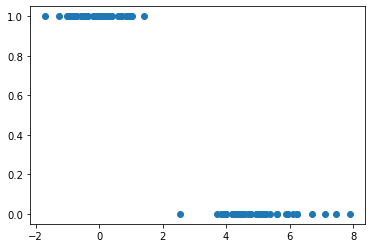

In [284]:
import numpy as np
from numpy.random import randn, uniform
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + 2.718 ** -x)
def normalized(vector): 
    return (vector - min(vector)) / (max(vector) - min(vector))

m = 100
X = np.array((np.ones(m), np.append(randn(m // 2) + uniform(4, 6), randn(m // 2)))).T
y = np.append(np.zeros(m // 2), np.ones(m // 2))

print(y)

# X[1:] = np.array([normalized(x) for x in X[1:]]) # normalize X
y = normalized(y)                                # normalize y

plt.scatter(X[:, 1], y)
plt.show()